<a href="https://colab.research.google.com/github/saro0307/DatascienceInternship/blob/main/_Exploratory_Data_Analysis_Terrorism_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [5]:
terror = pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

In [6]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [7]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [9]:
terror=terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [10]:
terror.isnull().sum()

Year               0
Month              0
Day                0
Country            0
state            419
Region             0
city             434
latitude        4243
longitude       4244
AttackType         0
Killed          7100
Wounded        10866
Target           637
Summary        66129
Group              1
Target_type        0
Weapon_type        1
Motive         83030
dtype: int64

In [11]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125694 entries, 0 to 125693
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         125694 non-null  int64  
 1   Month        125694 non-null  int64  
 2   Day          125694 non-null  int64  
 3   Country      125694 non-null  object 
 4   state        125275 non-null  object 
 5   Region       125694 non-null  object 
 6   city         125260 non-null  object 
 7   latitude     121451 non-null  float64
 8   longitude    121450 non-null  float64
 9   AttackType   125694 non-null  object 
 10  Killed       118594 non-null  float64
 11  Wounded      114828 non-null  float64
 12  Target       125057 non-null  object 
 13  Summary      59565 non-null   object 
 14  Group        125693 non-null  object 
 15  Target_type  125694 non-null  object 
 16  Weapon_type  125693 non-null  object 
 17  Motive       42664 non-null   object 
dtypes: float64(4), int64(3),

In [12]:
print("Country with the most attacks:",terror['Country'].value_counts().idxmax())
print("City with the most attacks:",terror['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror['Group'].value_counts().index[1])
print("Most Attack Types:",terror['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: South Asia
Year with the most attacks: 2013
Month with the most attacks: 5
Group with the most attacks: Shining Path (SL)
Most Attack Types: Bombing/Explosion


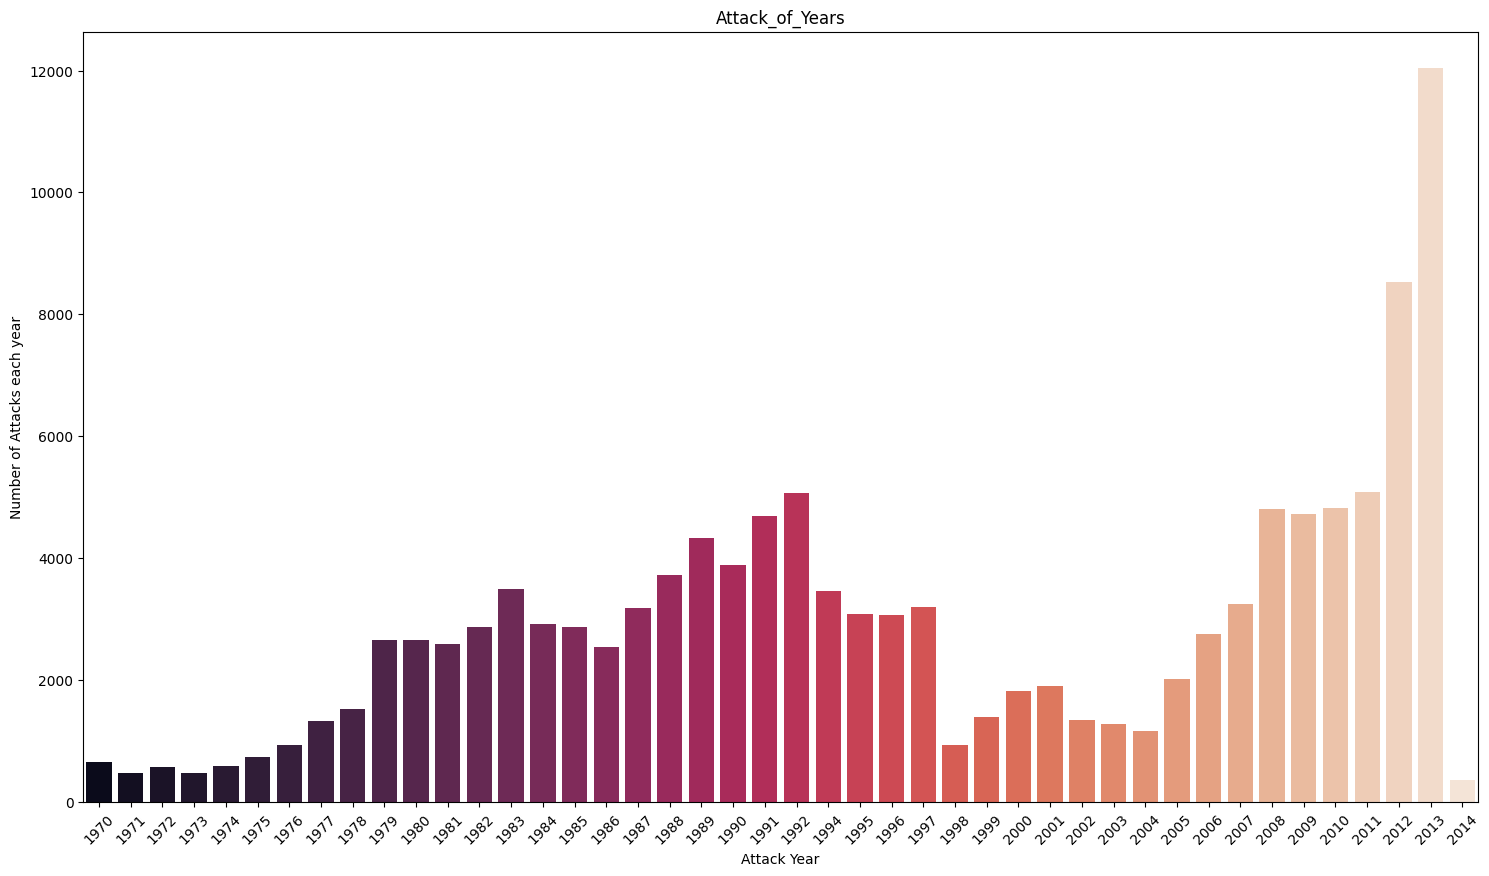

In [13]:
x_year = terror['Year'].unique()
y_count_years = terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

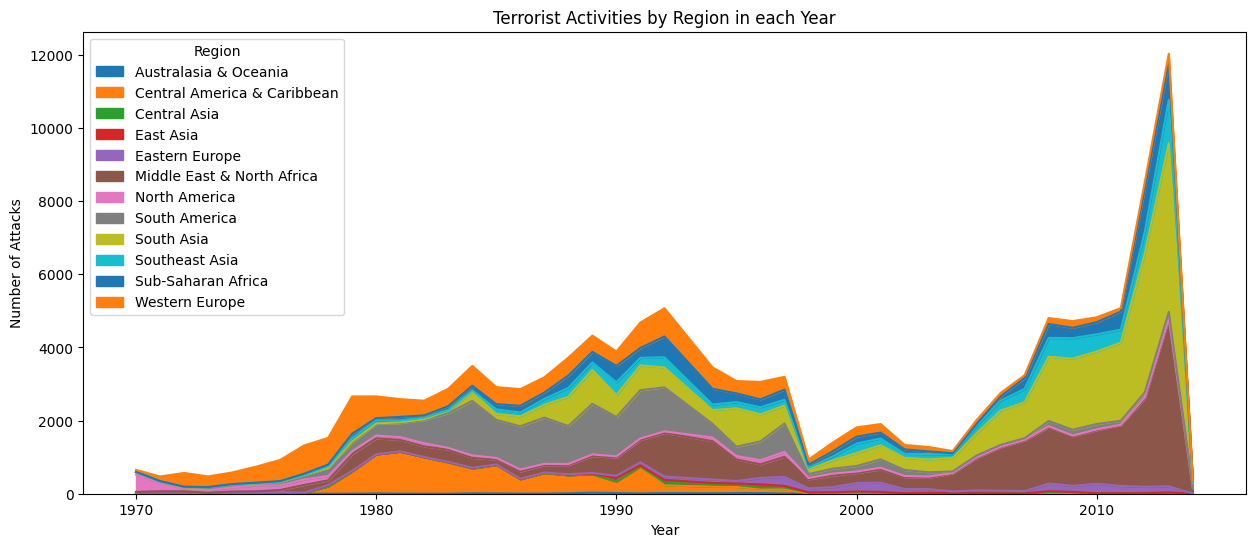

In [14]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()